In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [3]:
cov_1 = np.array([[0.5, 1], 
                  [1, 1]])
cov_2 = np.array([[1.5, 2], 
                  [2, 0.1]])

In [4]:
d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
d_2 = np.random.multivariate_normal(u_2, cov_2, 500)

C:\Users\DELL 5410\AppData\Local\Temp\ipykernel_12808\103381402.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
C:\Users\DELL 5410\AppData\Local\Temp\ipykernel_12808\103381402.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  d_2 = np.random.multivariate_normal(u_2, cov_2, 500)


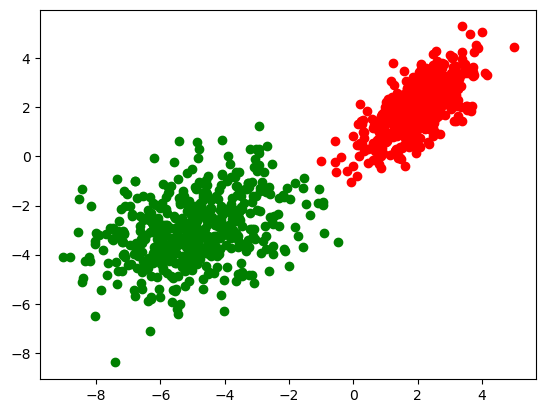

In [5]:
plt.scatter(d_1[:, 0], d_1[:, 1], color='red')
plt.scatter(d_2[:, 0], d_2[:, 1], color='green')

In [6]:
np.random.multivariate_normal?

In [7]:
dataset = np.ones((1000, 4))

In [8]:
dataset[:5]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
dataset[:500, 1:3] = d_1
dataset[500:, 1:3] = d_2

In [10]:
dataset[:5]

array([[1.        , 1.86663443, 1.2401055 , 1.        ],
       [1.        , 0.73492503, 0.67432331, 1.        ],
       [1.        , 1.09210685, 0.94121433, 1.        ],
       [1.        , 2.13971896, 1.95769153, 1.        ],
       [1.        , 3.64348697, 1.85020696, 1.        ]])

In [11]:
dataset[:500, -1] = 0

In [12]:
dataset[:5]

array([[1.        , 1.86663443, 1.2401055 , 0.        ],
       [1.        , 0.73492503, 0.67432331, 0.        ],
       [1.        , 1.09210685, 0.94121433, 0.        ],
       [1.        , 2.13971896, 1.95769153, 0.        ],
       [1.        , 3.64348697, 1.85020696, 0.        ]])

In [13]:
dataset[-5:]

array([[ 1.        , -3.30502611, -1.33922056,  1.        ],
       [ 1.        , -3.90774309, -2.92946547,  1.        ],
       [ 1.        , -4.56015586, -2.79460918,  1.        ],
       [ 1.        , -1.58050168, -1.28743309,  1.        ],
       [ 1.        , -3.25969945, -4.8263496 ,  1.        ]])

In [14]:
np.random.shuffle(dataset)

In [15]:
dataset

array([[ 1.        ,  1.76925173,  2.20802972,  0.        ],
       [ 1.        ,  2.06369863,  2.16796034,  0.        ],
       [ 1.        , -7.89701865, -3.1938918 ,  1.        ],
       ...,
       [ 1.        , -3.86460239, -2.80796824,  1.        ],
       [ 1.        ,  2.29171039,  1.53731059,  0.        ],
       [ 1.        ,  1.97950244,  1.22239798,  0.        ]])

In [16]:
X_train = dataset[:800, :-1]
Y_train = dataset[:800, -1]

X_test = dataset[800:, :-1]
Y_test = dataset[800:, -1]

In [17]:
X_test.shape, Y_test.shape, X_train.shape, Y_train.shape

((200, 3), (200,), (800, 3), (800,))

In [18]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [19]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [20]:
def cost(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1 - Y)*np.log(1 - y_p)))
    
    return loss

In [21]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    grad = X.T@(Y - y_p)
    
    return grad/X.shape[0]

In [22]:
def gradient_descent(X, Y, learning_rate = 0.003, epochs = 1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    cost_epoch = []
    
    for i in range(epochs):
        print("The algo is on epoch no.:", i, end='\r')
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    return theta, cost_epoch

In [23]:
Y_train = Y_train.reshape((-1, 1))
X_train.shape

(800, 3)

In [24]:
theta, cost = gradient_descent(X_train, Y_train, epochs=2000)

In [25]:
theta

array([[-0.24992364],
       [-0.92711028],
       [-0.70109207]])

In [26]:
cost[:10]

[0.6931471805599452,
 0.6796455777818321,
 0.6665962521491403,
 0.6539835526928798,
 0.6417920708741442,
 0.6300066808549865,
 0.6186125738516468,
 0.607595286886991,
 0.5969407263038903,
 0.5866351864314274]

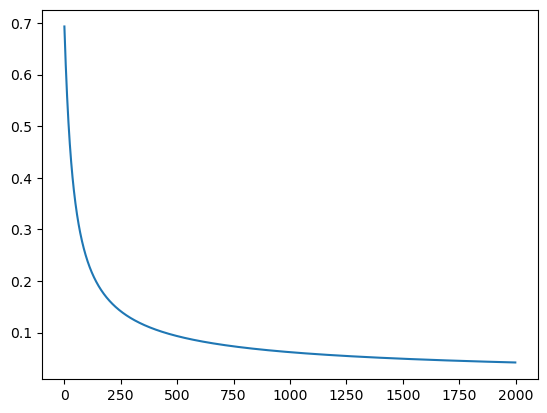

In [27]:
plt.plot(cost)

In [28]:
cost[-10:]

[0.042215623039039495,
 0.04220405815596405,
 0.04219250273556559,
 0.042180956765261915,
 0.04216942023249381,
 0.0421578931247251,
 0.04214637542944251,
 0.042134867134155665,
 0.04212336822639699,
 0.04211187869372173]

In [29]:
Y_test = Y_test.reshape((-1, 1))
Y_test.shape

(200, 1)

In [30]:
def predict(X, theta):
    y_p = hypothesis(X, theta)
    y_pred = []
    for i in y_p:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    y_pred = np.array(y_pred)
    return y_pred

In [31]:
pred = predict(X_test, theta)

In [32]:
pred = pred.reshape((-1, 1))
pred.shape

(200, 1)

In [33]:
Y_test.shape

(200, 1)

In [34]:
def accuracy(pred, label):
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            temp+=1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%", sep='')
    return (temp/pred.shape[0])*100

In [35]:
accuracy(pred, Y_test)

Accuracy = 99.0%


99.0